# Get unique tokens and assign index

In [1]:
#import library
import pandas as pd
import string
import matplotlib.pyplot as plt
import re
import numpy as np

df = pd.read_csv(r"D:\FYP\cyberbullying_preprocessed.csv")

In [2]:
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
df.head()

,tweet_text,cyberbullying_type,hate_speech,clean_text,text_length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,"words #katandandre, food crapilicious! #mkr",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,#aussietv white? #mkr #theblock #imacelebritya...,11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore? red velvet cupcakes?,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,"meh. p thanks heads up, concerned another angr...",10
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isis account pretending kurdish account. like ...,8


In [3]:
# get min length of text
min_length = df['text_length'].min()
print(min_length)

# get max length of text
max_length = df['text_length'].max()
print(max_length)

1
415


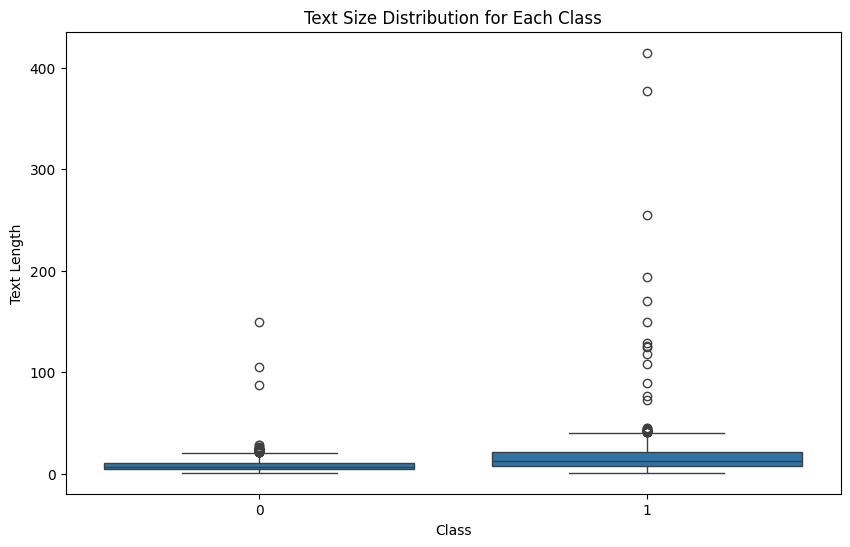

In [4]:
# visualize the size of text for each classes
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='hate_speech', y='text_length', data=df)
plt.title('Text Size Distribution for Each Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

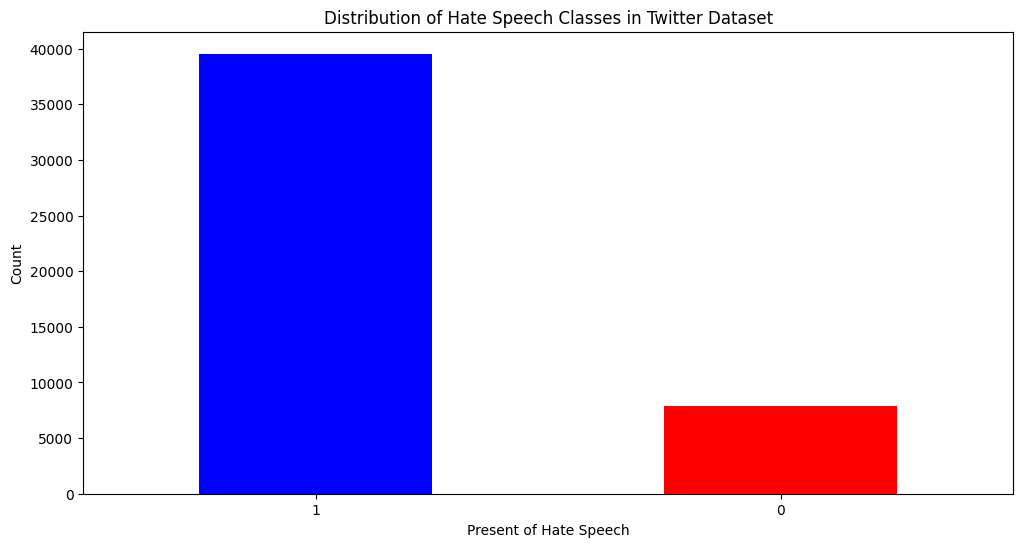

Total number of text that label as non hate = 7847
Total number of text that label as hate = 39538
Total unique value in column 'hate_speech': 
hate_speech
1    39538
0     7847
Name: count, dtype: int64


In [5]:
# visualize dataset
df100 = df[df['text_length'] <= 100].copy()

plt.figure(figsize=(12, 6))
count = df100['hate_speech'].value_counts()
count.plot(kind='bar',color=['blue', 'red'])
plt.title('Distribution of Hate Speech Classes in Twitter Dataset')
plt.xlabel('Present of Hate Speech')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# check and display the total number of occurrences of '0' in 'target'
count_nonhate = df100['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = df100['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'hate_speech\': ')
print(df100['hate_speech'].value_counts())

In [6]:
# initialized BertTokenizer to load pretrained subword tokenizer and define function to perform subword tokenization
import tokenizers
from transformers import AutoTokenizer, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def subword_tokenizer(text):
    tokenized_list = tokenizer.tokenize(text)
    return tokenized_list


print(df100.head())
df100['tokenized_text'] = df100['clean_text'].apply(subword_tokenizer)
print(df100.head())

# Create a list of all tokens in the DataFrame
all_tokens = [token for sublist in df100['tokenized_text'] for token in sublist]

# Create a set of unique tokens
unique_tokens = set(all_tokens)

# Create a vocabulary dictionary with numerical indices
vocab_dict = {token: idx+1 for idx, token in enumerate(unique_tokens)}

# Map the tokenized_text to numerical indices using the vocabulary
df100['numerical_tokens'] = df100['tokenized_text'].apply(lambda tokens: [vocab_dict[token] for token in tokens])

print(df100.head())
print(df100.info())

                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   hate_speech                                         clean_text  text_length  
0            0        words #katandandre, food crapilicious! #mkr            5  
1            0  #aussietv white? #mkr #theblock #imacelebritya...           11  
2            0                 classy whore? red velvet cupcakes?            5  
3            0  meh. p thanks heads up, concerned another angr...           10  
4            0  isis account pretending kurdish account. like ...            8  
                                          tweet_text cyberbully

In [7]:
print(vocab_dict)

{'recipes': 1, 'duel': 2, 'discussion': 3, 'coral': 4, 'diamond': 5, 'originates': 6, 'swept': 7, 'believer': 8, 'metadata': 9, 'length': 10, 'kiss': 11, '##rise': 12, 'legs': 13, '##esh': 14, 'footballer': 15, 'menu': 16, 'tender': 17, 'sino': 18, 'expect': 19, 'plotted': 20, 'checks': 21, 'peasants': 22, 'activities': 23, 'access': 24, 'space': 25, 'pursuit': 26, 'coated': 27, 'synonym': 28, 'measured': 29, 'fiancee': 30, 'charities': 31, 'floor': 32, 'advocating': 33, 'quaker': 34, 'segregation': 35, 'hassan': 36, 'reelected': 37, 'butcher': 38, '##crat': 39, 'produces': 40, 'regret': 41, 'mfa': 42, 'qi': 43, 'publications': 44, 'anna': 45, 'jersey': 46, 'desired': 47, 'sucks': 48, 'dungeons': 49, 'suffering': 50, 'piracy': 51, 'republic': 52, 'gemini': 53, 'polite': 54, 'xu': 55, 'glowing': 56, 'violin': 57, 'fleeing': 58, 'hitchcock': 59, 'feminism': 60, 'heated': 61, '##bt': 62, '##nessy': 63, '##broken': 64, '##oga': 65, '##raction': 66, 'surgeon': 67, 'laughing': 68, '##kers': 

# Create word embedding vectors for each unique word

In [8]:
# load GloVe model and save in word2vec format
import gensim.downloader as api
from gensim.models import KeyedVectors

glove_path = "D:\Desktop\glove.42B.300d.bin"
word2vec_path = "D:\Desktop\word2vec-google-news-300.bin"

In [9]:
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=True)
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [10]:
# define embedding size
embedding_size = 300
vocab_size=len(vocab_dict)+1
print(vocab_size)

embedding_matrix_w2v = np.zeros((vocab_size, embedding_size))
embedding_matrix_glove = np.zeros((vocab_size, embedding_size))

# modify embedding matrix is tokens exist in the glove embedding technique
for word, i in vocab_dict.items():
    try:
        # Try to get the vector from GloVe and assign it to the corresponding matrix
        embedding_matrix_glove[i] = glove_model[word]
    except KeyError:
        # If a word is not found in GloVe, set the vector to zeros
        embedding_matrix_glove[i] = np.zeros(embedding_size)
        
    try:
        # Try to get the vector from Word2Vec and assign it to the corresponding matrix
        embedding_matrix_w2v[i] = word2vec_model[word]
    except KeyError:
        # If a word is not found in Word2Vec, set the vector to zeros
        embedding_matrix_w2v[i] = np.zeros(embedding_size)

print(embedding_matrix_glove[2])
print('\n')
print(embedding_matrix_w2v[2])
print('\n')
embedding_matrix = np.mean((embedding_matrix_glove, embedding_matrix_w2v), axis=0)
print(embedding_matrix[2])
print(embedding_matrix.shape[1])

19501
[-6.73539996e-01 -2.05669999e-01  2.61200011e-01 -1.76660001e-01
 -2.20540002e-01 -1.00680001e-01 -1.16520000e+00  4.28629994e-01
  1.56379998e-01  5.82750022e-01 -3.03140014e-01 -5.03660023e-01
 -2.52420008e-01  1.56200007e-01 -3.12180002e-03  1.45530000e-01
 -5.97900013e-03 -3.14689994e-01 -1.05269998e-01  1.52050003e-01
  3.23780000e-01  2.59339988e-01 -1.91180006e-01 -6.64499998e-01
  3.73769999e-01  3.64459991e-01 -9.72689968e-03  1.42560005e-01
 -5.55660009e-01  1.24670005e+00 -2.30820000e-01 -2.90639997e-02
 -2.28569999e-01 -4.32000011e-01 -2.59240009e-02  2.12960005e-01
  3.70429993e-01  1.73439994e-01 -5.40329993e-01  1.87600002e-01
  2.33180001e-01  2.18789995e-01 -1.48360003e-02 -3.47959995e-01
  2.54539996e-01 -2.01330006e-01  1.71450004e-01 -1.59789994e-01
  1.72359999e-02 -3.06059998e-02 -5.16320020e-03 -4.02009994e-01
 -1.48279995e-01  2.03549992e-02 -6.65080026e-02 -9.23480019e-02
 -3.47359985e-01  2.94609994e-01 -3.57699990e-01 -1.16939999e-01
  4.11430001e-01  7

In [11]:
try:
        print(word2vec_model['cassidy'])
except KeyError:
        # If a word is not found in Word2Vec, set the vector to zeros
        print(np.zeros(embedding_size))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
df100["text_length"] = df100["tokenized_text"].apply(lambda x: len(x))

# Drop rows where 'text_length' is 0
df100 = df100[df100['text_length'] != 0]

# Resetting the index after dropping rows
df100 = df100.reset_index(drop=True)

# Now df contains only the rows where 'text_length' is not 0
print(df100.head())

# get max length of text
min_length = df100['text_length'].min()
print(min_length)

# get max length of text
max_length = df100['text_length'].max()
print(max_length)

                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   hate_speech                                         clean_text  \
0            0        words #katandandre, food crapilicious! #mkr   
1            0  #aussietv white? #mkr #theblock #imacelebritya...   
2            0                 classy whore? red velvet cupcakes?   
3            0  meh. p thanks heads up, concerned another angr...   
4            0  isis account pretending kurdish account. like ...   

   text_length                                     tokenized_text  \
0           15  [words, #, kata, ##nda, ##nd, ##re, ,, food, c...

# Training Preparation

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences


X = df100['numerical_tokens']
y = df100['hate_speech']

# split X and y into train test validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=77)

# instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=66)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.values.reshape(-1,1), y_train)
X_train = pd.Series(X_train_resampled.flatten())
y_train = pd.Series(y_train_resampled)

# pad the text to have same length
X_train = pad_sequences(X_train,maxlen=max_length, padding='post')
X_val = pad_sequences(X_val,maxlen=max_length, padding='post')
X_test = pad_sequences(X_test,maxlen=max_length, padding='post')
print(X_train[0])

# convert target to array
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# printing shape
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

# printing shape
print('Shape of X val:', X_val.shape)
print('Shape of y val:', y_val.shape)

# printing shape
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)


[  799 15891 19350  5134 11813  2552  3231  3961     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
Shape of X train: (63198, 139)
Shape of y train: (63198,)
Shape of X val: (4739, 139)
Shape of y val: (4739,)
Shape of X test: (4738, 139)
Shape of y te

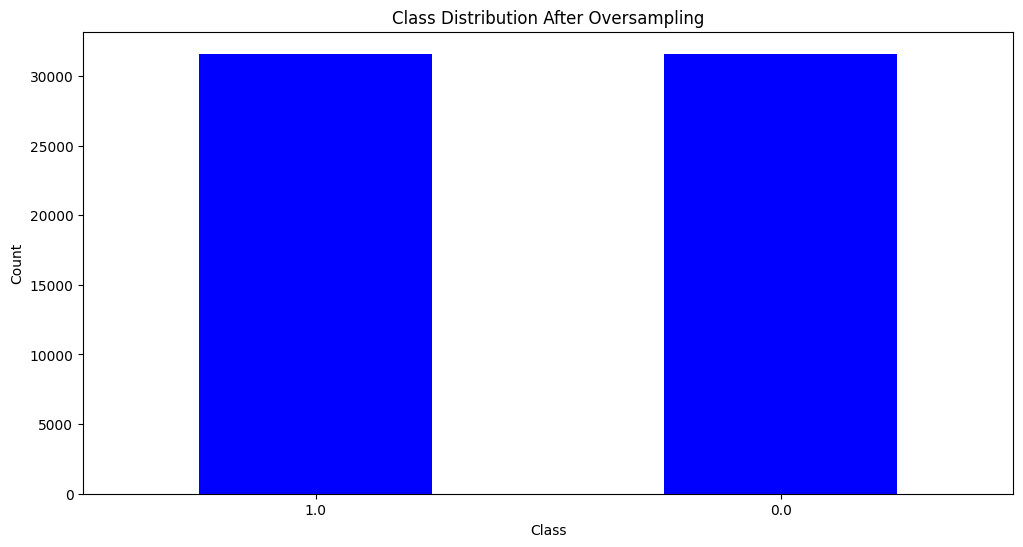

Total number of text that label as non hate = 31599
Total number of text that label as hate = 31599
Total unique value in column 'hate_speech': 
hate_speech
1.0    31599
0.0    31599
Name: count, dtype: int64


In [14]:
# Create a DataFrame to display the class distribution
new_df = pd.DataFrame({'hate_speech': y_train})
class_counts = new_df['hate_speech'].value_counts()

# Plot a bar graph
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='blue')
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

count_nonhate = new_df['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = new_df['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'hate_speech\': ')
print(new_df['hate_speech'].value_counts())

# Deep Learning model hypertuning

In [15]:
# import libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras import regularizers
from keras.metrics import Precision, Recall, F1Score

from tensorflow.keras.layers import Bidirectional, LSTM

In [16]:
import tensorflow as tf
# Define a custom callback to skip the first epoch's results
class EpochNumCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs['epoch_nums'] = epoch+1
        # Only process metrics from the second epoch onwards
        super().on_epoch_end(epoch, logs)
            
callback = [EpochNumCallback(), EarlyStopping(monitor='val_f1_score', patience=3, mode='max', restore_best_weights=True, start_from_epoch=5)]


In [17]:
input_size = X_train.shape[1]

embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=True)

input_layer = Input(shape=(input_size,))
embedding = embedding_layer(input_layer)
bilstm = Bidirectional(LSTM(32, activation='relu', kernel_regularizer=regularizers.l2(1), recurrent_regularizer=regularizers.l2(1)))(embedding)
flatten = Flatten()(bilstm)
dropout = Dropout(0.3)(flatten)
dense = Dense(32)(dropout)
output_layer = Dense(units=1, activation='sigmoid')(dense)

model = Model(input_layer, output_layer)

optimizer = Adam(learning_rate=0.0005)
    
model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', Precision(thresholds=0.5), Recall(thresholds=0.5), F1Score(threshold=0.5)])

In [18]:
nhp_history = model.fit(X_train, 
          y_train, 
          epochs=30, 
          batch_size=32, 
          validation_data=(X_val, y_val), 
          callbacks=callback)

Epoch 1/30


1975/1975 [==============================] - 308s 153ms/step - loss: 16.9383 - accuracy: 0.7714 - precision: 0.7766 - recall: 0.7619 - f1_score: 0.7692 - val_loss: 0.4361 - val_accuracy: 0.8008 - val_precision: 0.9562 - val_recall: 0.7986 - val_f1_score: 0.8703 - epoch_nums: 1.0000
Epoch 2/30
1975/1975 [==============================] - 222s 112ms/step - loss: 0.3781 - accuracy: 0.8586 - precision: 0.8981 - recall: 0.8091 - f1_score: 0.8513 - val_loss: 0.3799 - val_accuracy: 0.8270 - val_precision: 0.9348 - val_recall: 0.8528 - val_f1_score: 0.8919 - epoch_nums: 2.0000
Epoch 3/30
1975/1975 [==============================] - 224s 114ms/step - loss: 0.3267 - accuracy: 0.8820 - precision: 0.9199 - recall: 0.8369 - f1_score: 0.8764 - val_loss: 0.4061 - val_accuracy: 0.8173 - val_precision: 0.9429 - val_recall: 0.8321 - val_f1_score: 0.8840 - epoch_nums: 3.0000
Epoch 4/30
1975/1975 [==============================] - 245s 124ms/step - loss: 0.2943 - accuracy: 0.8974 - precision:

149/149 [==============================] - 3s 20ms/step
predicted_accuracy = 0.8203883495145631
predicted_precision = 0.9118500923726577
predicted_recall = 0.8698388721047331
predicted_f1_score = 0.8903491818064683


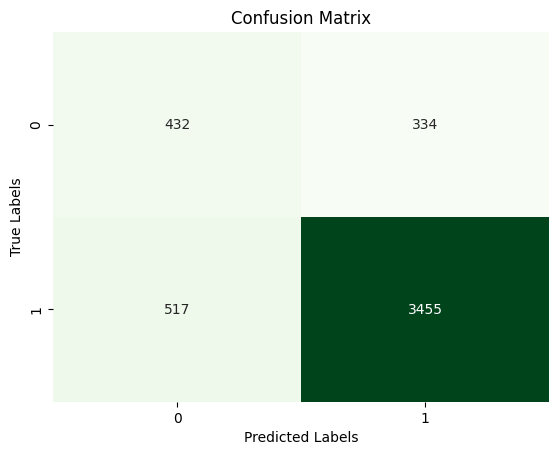

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# predict using trained model with X_test dataset
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype('float32')


# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'predicted_accuracy = {accuracy}')
# Precision
precision = precision_score(y_test, y_pred_binary)
print(f'predicted_precision = {precision}')
# Recall
recall = recall_score(y_test, y_pred_binary)
print(f'predicted_recall = {recall}')
# F1 Score
f1 = f1_score(y_test, y_pred_binary)
print(f'predicted_f1_score = {f1}')

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Deep learning model hypertuning

In [20]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Bidirectional, LSTM

input_size = X_train.shape[1]

def bilstm_model(hp):
    out_space = hp.Choice("output_space", values=[16, 32, 64, 128])
    dense_units = hp.Choice("dense_units", values=[16, 32, 64, 128])
    learning_rate = hp.Choice("learning_rate", values=[0.0001, 0.0005, 0.001, 0.005])
    
    embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=True)

    input_layer = Input(shape=(input_size,))
    embedding = embedding_layer(input_layer)

    bilstm = Bidirectional(LSTM(out_space, activation='relu', kernel_regularizer=regularizers.l2(1), recurrent_regularizer=regularizers.l2(1)))(embedding)
    flatten = Flatten()(bilstm)
    dropout = Dropout(0.3)(flatten)
    dense = Dense(dense_units)(dropout)
    output_layer = Dense(units=1, activation='sigmoid')(dense)

    model = Model(input_layer, output_layer)

    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', Precision(thresholds=0.5), Recall(thresholds=0.5), F1Score(threshold=0.5)])

    return model

In [21]:
# Instantiate the tuner
import keras_tuner as kt
from keras_tuner import Objective
from keras_tuner.tuners import GridSearch

tuner = kt.GridSearch(
    bilstm_model,
    objective=Objective('val_f1_score', direction='max'),
    directory='BiLSTM Grid Tuning',
    project_name='Glove+Word2Vec (mean) oversampled grid-tune'
)

Reloading Tuner from BiLSTM Grid Tuning\Glove+Word2Vec (mean) oversampled grid-tune\tuner0.json


In [22]:
# Search for the best hyperparameter configuration
tuner.search(X_train, y_train, 
             batch_size=32, 
             epochs=30, 
             verbose=2, 
             validation_data=(X_val, y_val), 
             callbacks=callback)

# Retrieve best hyperparameters

In [23]:
# Retrieve all trials
all_trials = tuner.oracle.trials.values()

# Loop through each trial and get the score
for trial in all_trials:
    trial_id = trial.trial_id
    trial_score = trial.score
    trial_step = trial.best_step
    print("Trial ID:", trial_id)
    print("Score:", trial_score)
    print("Step:", trial_step)

Trial ID: 0017
Score: 0.9004641771316528
Step: 4
Trial ID: 0028
Score: 0.882250964641571
Step: 5
Trial ID: 0033
Score: 0.9000387191772461
Step: 3
Trial ID: 0004
Score: 0.8923725485801697
Step: 8
Trial ID: 0007
Score: 0.8893555998802185
Step: 1
Trial ID: 0009
Score: 0.8989253044128418
Step: 6
Trial ID: 0002
Score: 0.8974359035491943
Step: 3
Trial ID: 0030
Score: 0.8958200216293335
Step: 5
Trial ID: 0008
Score: 0.8873276710510254
Step: 5
Trial ID: 0000
Score: 0.89674973487854
Step: 10
Trial ID: 0001
Score: 0.9017458558082581
Step: 8
Trial ID: 0056
Score: 0.8962934613227844
Step: 9
Trial ID: 0025
Score: 0.897577166557312
Step: 8
Trial ID: 0020
Score: 0.8976991772651672
Step: 9
Trial ID: 0010
Score: 0.9011045694351196
Step: 2
Trial ID: 0015
Score: 0.882783830165863
Step: 7
Trial ID: 0005
Score: 0.8956151008605957
Step: 7
Trial ID: 0011
Score: 0.8863697052001953
Step: 0
Trial ID: 0034
Score: 0.8976218104362488
Step: 8
Trial ID: 0035
Score: 0.8857996463775635
Step: 9
Trial ID: 0003
Score: 0.

In [24]:
# Retrieve the best hyperparameters #0032,
best_trial = tuner.oracle.get_trial('0001')
best_hyperparameters = best_trial.hyperparameters

# Re-instantiate the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)
best_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 139)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 139, 300)          5850300   
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                40576     
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                           

# Train 1D CNNs with best hyperparameters

In [25]:
hp_history = best_model.fit(X_train, 
                         y_train, 
                         epochs=30,
                         batch_size=32, 
                         validation_data=(X_val, y_val), 
                         callbacks=callback)

Epoch 1/30
1975/1975 [==============================] - 215s 107ms/step - loss: 11.2700 - accuracy: 0.7625 - precision_1: 0.7747 - recall_1: 0.7404 - f1_score: 0.7571 - val_loss: 0.4581 - val_accuracy: 0.7978 - val_precision_1: 0.9703 - val_recall_1: 0.7825 - val_f1_score: 0.8663 - epoch_nums: 1.0000
Epoch 2/30
1975/1975 [==============================] - 212s 108ms/step - loss: 0.3781 - accuracy: 0.8579 - precision_1: 0.8988 - recall_1: 0.8065 - f1_score: 0.8502 - val_loss: 0.4376 - val_accuracy: 0.7959 - val_precision_1: 0.9690 - val_recall_1: 0.7812 - val_f1_score: 0.8650 - epoch_nums: 2.0000
Epoch 3/30
1975/1975 [==============================] - 212s 107ms/step - loss: 0.3266 - accuracy: 0.8798 - precision_1: 0.9207 - recall_1: 0.8313 - f1_score: 0.8737 - val_loss: 0.3818 - val_accuracy: 0.8234 - val_precision_1: 0.9364 - val_recall_1: 0.8465 - val_f1_score: 0.8892 - epoch_nums: 3.0000
Epoch 4/30
1975/1975 [==============================] - 213s 108ms/step - loss: 0.2964 - accurac

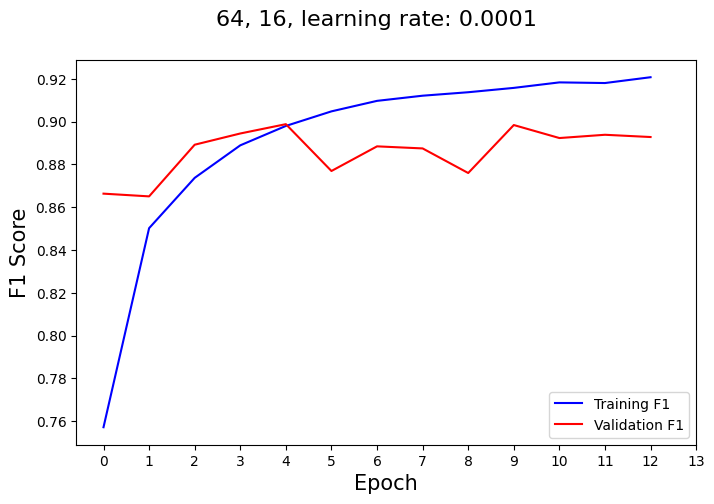

In [26]:
#plotting f1
plt.figure(figsize=(8, 5))  # Create a new figure for each plot
plt.suptitle(f'64, 16, learning rate: 0.0001', fontsize=16)
plt.ylabel('F1 Score', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(hp_history.history['f1_score'], color='b', label='Training F1')
plt.plot(hp_history.history['val_f1_score'], color='r', label='Validation F1')
plt.legend(loc='lower right')

plt.xticks(range(0, len(hp_history.history['f1_score']) + 1, 1))
plt.show()

149/149 [==============================] - 2s 14ms/step
predicted_accuracy = 0.8216547066272689
predicted_precision = 0.9070554543087738
predicted_recall = 0.877139979859013
predicted_f1_score = 0.891846921797005


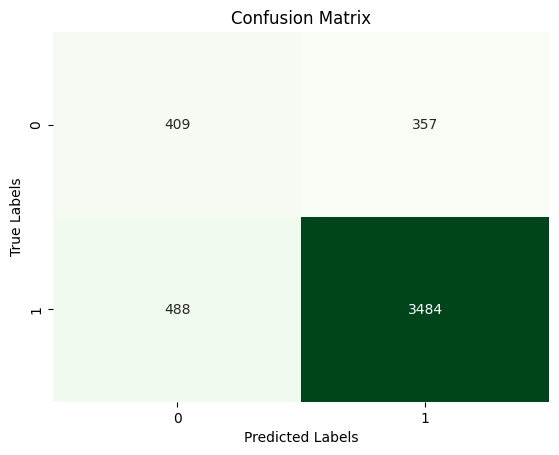

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# predict using trained model with X_test dataset
y_pred1 = best_model.predict(X_test)
y_pred_binary1 = (y_pred1 >= 0.5).astype('float32')


# Accuracy
accuracy1 = accuracy_score(y_test, y_pred_binary1)
print(f'predicted_accuracy = {accuracy1}')
# Precision
precision1 = precision_score(y_test, y_pred_binary1)
print(f'predicted_precision = {precision1}')
# Recall
recall1 = recall_score(y_test, y_pred_binary1)
print(f'predicted_recall = {recall1}')
# F1 Score
f11 = f1_score(y_test, y_pred_binary1)
print(f'predicted_f1_score = {f11}')

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary1)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# predict using trained model with X_test dataset
y_pred2 = model.predict(X_test)
y_pred_binary2 = (y_pred2 > 0.14).astype('float32')


# Accuracy
accuracy2 = accuracy_score(y_test, y_pred_binary2)
print(f'predicted_accuracy = {accuracy2}')
# Precision
precision2 = precision_score(y_test, y_pred_binary2)
print(f'predicted_precision = {precision2}')
# Recall
recall2 = recall_score(y_test, y_pred_binary2)
print(f'predicted_recall = {recall2}')
# F1 Score
f12 = f1_score(y_test, y_pred_binary2)
print(f'predicted_f1_score = {f12}')


# compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary2)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(type(X_train))